# Helping an apparel brand

You have been approached by the Curry brand of shoes. They want to design a new limited edition for their shoes, mainly based around one of their existing products.


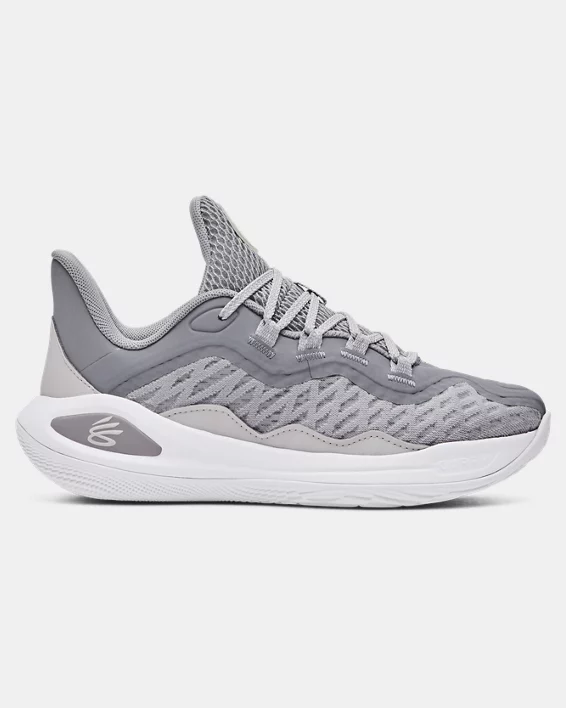

In [11]:
from io import BytesIO
import IPython
import json
import os
from PIL import Image
import requests
import getpass
import time
from google.colab import output


api_key = "" #@param {type:"string"}
API_KEY = api_key


In [12]:
# This is the base url for the Stability API
BASE_STABILITY_URL = "https://api.stability.ai/"

# Declare endpoints as per functionality needed
API_URLS = {
        "control_structure": BASE_STABILITY_URL + "v2beta/stable-image/control/structure"
}

# Declare header:
headers = {
    "accept": "image/*",
    "authorization": f"Bearer {API_KEY}", # This is fetching data from the API_KEY variable above.
}

In [13]:
search_prompt = "Background should be lively and vivid that makes sure the customer know that its a Curry Brand Shoes. Background should not be plain and should have vivid images related to Curry to show off its a Curry brand shoe"

# Function to send image generation requests to Stability AI's 'control structure' endpoint.
def make_control_structure_request(prompt, image,*, control_strength=None, negative_prompt=None, seed=None):
    fields_in_request = [{"prompt":prompt,"search_prompt":search_prompt}]
    if negative_prompt:
      fields_in_request.append({"negative_prompt":negative_prompt})
    if control_strength:
      fields_in_request.append({"control_strength":control_strength})
    if seed:
      fields_in_request.append({"seed":seed})
    request_data = {}
    for field in fields_in_request:
        request_data.update(field)

    response = requests.post(
        API_URLS["control_structure"],
        headers=headers,
        files={"image": open(image,"rb")},
        data=request_data,
    )
    return response

In [14]:
# And another function to save the results to a file so we can see them
def save_image(response, filename):
  if response.status_code == 200:
    with open(filename, 'wb') as file:
        file.write(response.content)
  else:
    raise Exception(str(response.json()))

In [15]:
# Call the make_control_structure_request function
spiderman_image_structure = "/content/Original_Shoe.webp"
structure_prompt = "You have been approached by the Curry brand of shoes. They want to design a new limited edition for their shoes, mainly based around one of their existing products.What they're looking for is something that can pop. They don't want a situation where that shoe can feel generic.In other words they don't want people to see the shoe in their feeds and just scroll by, assuming it's a generic, mass produced product. They want to convey that this special edition is a one of a kind basketball shoe, produced and co-signed by one of the greatest players of all time."

structure_response = make_control_structure_request(prompt=structure_prompt, image=spiderman_image_structure, control_strength=0.7)
save_image(structure_response, "Curry_Brand_Shoe.png")

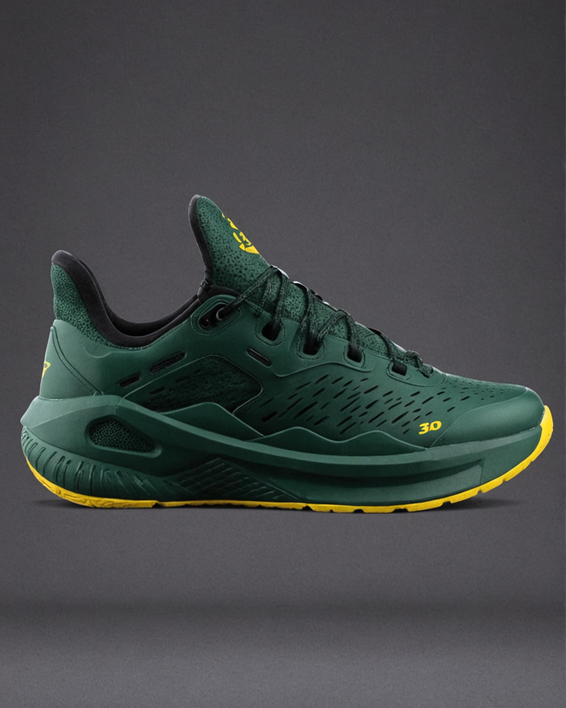

In [16]:
# Visualize the image generate by AI
IPython.display.Image("Curry_Brand_Shoe.png")

Sample Result Image:
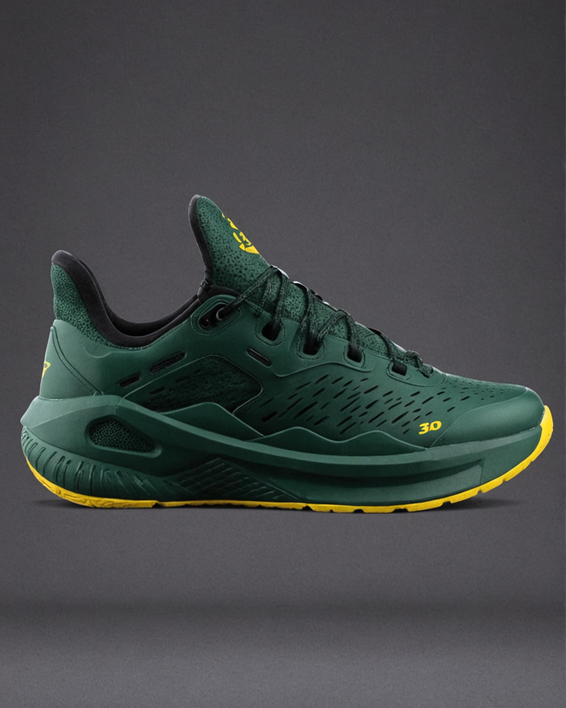
